Banded Matrix Multiplication Results

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO


In [68]:
naive_results = '''
GridDim,BlockDim,FLOPS,GFLOPS
16,64,7.2395e+09,7.2395
11,96,7.37846e+09,7.37846
8,128,7.50161e+09,7.50161
7,160,7.26875e+09,7.26875
6,192,6.99879e+09,6.99879
5,224,7.26903e+09,7.26903
4,256,7.18823e+09,7.18823
'''

df_naive = pd.read_csv(StringIO(naive_results), index_col=0)

In [69]:
smem_results = '''
GridDim,BlockDim,FLOPS,GFLOPS
16,64,1.06212e+10,10.6212
11,96,1.46218e+10,14.6218
8,128,1.26872e+10,12.6872
7,160,1.46553e+10,14.6553
6,192,1.5208e+10,15.208
5,224,1.40557e+10,14.0557
4,256,1.39316e+10,13.9316
'''

df_smem = pd.read_csv(StringIO(smem_results), index_col=0)

In [70]:
smem_t2_colmaj_results = '''
GridDim,BlockDim,FLOPS,GFLOPS
16,64,1.47983e+10,14.7983
11,96,3.42142e+10,34.2142
8,128,2.10858e+10,21.0858
7,160,3.41538e+10,34.1538
6,192,3.41784e+10,34.1784
5,224,2.86024e+10,28.6024
4,256,2.84872e+10,28.4872
'''

df_smem_t2colmaj = pd.read_csv(StringIO(smem_t2_colmaj_results), index_col=0)

In [71]:
df_all = pd.concat([df_naive, df_smem, df_smem_t2colmaj], axis=1, keys=["naive", "smem", "smem_t2colmaj"])

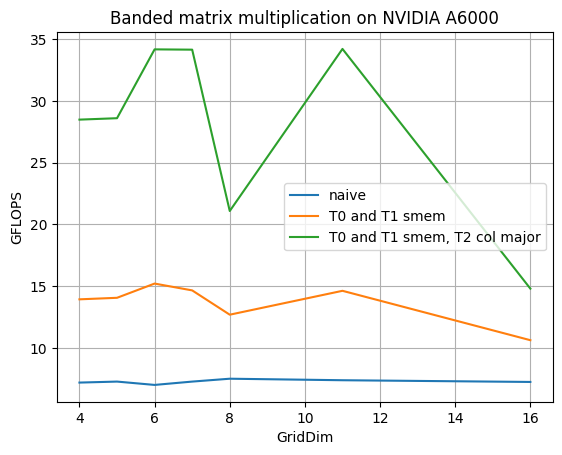

In [72]:
plt.plot(df_all.index, df_all["naive"]["GFLOPS"], label="naive")
plt.plot(df_all.index, df_all["smem"]["GFLOPS"], label="T0 and T1 smem")
plt.plot(df_all.index, df_all["smem_t2colmaj"]["GFLOPS"], label="T0 and T1 smem, T2 col major")
plt.title("Banded matrix multiplication on NVIDIA A6000")
plt.xlabel("GridDim")
plt.ylabel("GFLOPS")
plt.legend()
plt.grid()
plt.show()

In [73]:
def print_best_flops(strategy="naive"):
    pd.options.display.float_format = '{:,.2f}'.format
    df = df_all[strategy]
    best = df[df["GFLOPS"] == df["GFLOPS"].max()].drop(columns=["FLOPS"])
    print(f"{strategy}\n{best}\n")

for strategy in ["naive", "smem", "smem_t2colmaj"]:
    print_best_flops(strategy)

naive
         BlockDim  GFLOPS
GridDim                  
8             128    7.50

smem
         BlockDim  GFLOPS
GridDim                  
6             192   15.21

smem_t2colmaj
         BlockDim  GFLOPS
GridDim                  
11             96   34.21



In [74]:
df_all

naive                             smem                            
        BlockDim            FLOPS GFLOPS BlockDim             FLOPS GFLOPS   
GridDim                                                                      
16            64 7,239,500,000.00   7.24       64 10,621,200,000.00  10.62  \
11            96 7,378,460,000.00   7.38       96 14,621,800,000.00  14.62   
8            128 7,501,610,000.00   7.50      128 12,687,200,000.00  12.69   
7            160 7,268,750,000.00   7.27      160 14,655,300,000.00  14.66   
6            192 6,998,790,000.00   7.00      192 15,208,000,000.00  15.21   
5            224 7,269,030,000.00   7.27      224 14,055,700,000.00  14.06   
4            256 7,188,230,000.00   7.19      256 13,931,600,000.00  13.93   

        smem_t2colmaj                           
             BlockDim             FLOPS GFLOPS  
GridDim                                         
16                 64 14,798,300,000.00  14.80  
11                 96 34,214,200,000.00  34.21  
8                 128 21,085,800,000.00  21.09  
7                 160 34,153,800,000.00  34.15  
6                 192 34,178,400,000.00  34.18  
5                 224 28,602,400,000.00  28.60  
4                 256 28,487,200,000.00  28.49